# Clustering




The _objectives_ in the following `Notebook` are:

- To understand why we need `clustering`
- To preprocess the data for clustering and find out number of clusters.
- To improve clustering accuracy and report the business insights.


__Some important points:__
- For solving this problem we will be following the steps discussed in the NB and for explaining the observation `boxes` will be used

- `class` function __clustering.py__ is used with all utilities and the scripts and is  imported as .py for performing clustering algorithms to avoid repeat action of code.

## Understanding

> Since, we have now understood the __objective__ of data and observed some patterns in it the `fundamental question` which remains is how do I  <code style="background:yellow;color:black">increase the revenue</code>  out of my business?

> For doing this we will select some features based on customer `purchasing behaviour` and try to <code style="background:yellow;color:black">cluster out according to priority groups</code>.

The clusters formed would help us to give the following information:

1. Plan out demand capacity planning during a particular period of time-based on product and duration of the year.

2. Check out the priority to  maintain my __inventory__ and increase `operational efficiency.`

3. Based on this objective keeping up with customer satisfaction as more customer-centric the business more better are the results.



## Data Preparation

We will prepare the data and also generate features for our clustering algorithms

In [1]:
# run the libraries
import pandas as pd
import numpy as np
%run clustering.py
%run viz.py

In [2]:
# read the cleaned data and see it....
df = pd.read_csv('EMP_Cleaned_File.csv')
df.head()

,CustomerHash,OrderHash,Date_Order,Customer_Age,Gender,Account_Age,AffinityProductGender,Category_Reporting,Genre,ClientType,...,FirstOrder,Marketing_Channel,Pieces_Ordered,Pieces_Outbound,Pieces_Fulfilled,OrderValue,Revenue_Goods,Delivery_Value,Discount_Total,OrderProfit
0,0x1E1626FECA5B3D07C5BD9809E1C529E64AA416CC,0x7BFC6D3AF3CCB5292515B773D69DC5D84DA7CD60,2020-11-21,33.0,Woman,0,Female,Fashion / Private label - Apparel,Private label,app,...,No,direct,2,2.0,2.0,24.3363,24.34,24.34,-11.85,10.2251
1,0x0A6614AADFF1B528160D2FA0F986391D4FE8AF9E,0xE83E9EBAED365686CEFF9F4F6DF278E9DA35B4A6,2020-03-26,42.0,Woman,4,Unisex,Music - Apparel,Merchandise - Music,mobile,...,No,affiliating,1,1.0,1.0,21.0000,21.00,21.00,0.00,7.0450
2,0xFA7DAAD0DE71512AE880D307C5AD3FD2940ABAB7,0x9C9784A1194B7DD4A76B0EAD1D144631B2CD1662,2020-04-19,29.0,Woman,1,Female,Entertainment - Apparel,Merchandise - Film & TV,desktop,...,No,direct,4,4.0,2.0,86.3530,42.00,86.36,-18.64,16.0117
3,0x19DC7A03794164D3CA88A70FA80EF5AA6E2A8479,0x8BFAE5CA7ED52A5310DA271570E91826B467A19E,2020-10-01,54.0,Man,11,Female,Fashion / Private label - Apparel,Private label,desktop,...,No,direct,1,1.0,0.0,41.9741,0.00,41.97,-1.12,-8.0409
4,0x93EE384997774E090DEF62C2B592EF5E9330C714,0xF122A416F2B14C8D7CCA79F4FA623CAEE5671EEC,2021-02-14,39.0,Woman,0,Female,Fashion / 3rd Party - Apparel,3rd Party Brands,mobile,...,Yes,Payback,5,5.0,5.0,115.5630,115.56,115.56,-28.90,59.2625


### Features for clustering

__Cyclic Encoding__

- Since, the time varibales are cyclic in nature we will transform it into __sin and cosine__ components.

- This components will make sure the distance between my lowest and largest time values are continous.

In [3]:
## encode the sin and cos transformations i.e put it into sin and cosine
def encode(df, col, max_val):
    '''
    This function gives sine and cosine transformation of variables by input of cols and max values
    '''
    df[col + '_Sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_Cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

In [4]:
## lets get datetime based order
df['Date_Order'] = pd.to_datetime(df['Date_Order'])
df.sort_values(by='Date_Order',inplace=True)

# get date , month and year
df['Day']        = [int(i.strftime('%u')) for i in df['Date_Order']]
df['Month']      = [int(i.strftime('%m')) for i in df['Date_Order']]

In [5]:
## encode the Day and Month
df = encode(df, 'Day', 7)
df = encode(df, 'Month', 12)

### Feature selection

> We have selcted some features from the data based on our understanding of `domain and necessary relations` to cluster out `customer purchases` to target them into priority group.


> We will also generate some features based on time as we need to find out __trend of customer purchase__.

In [6]:
## feature selection
features    = ['Customer_Age','OrderValue','Revenue_Goods','Delivery_Value','Day_Sin','Day_Cos','Month_Sin','Month_Cos','Gender','Category_Reporting','Marketing_Channel']


## categorical features
cat_features = ['Gender','Marketing_Channel']

### Label encoding categorical variables

In [7]:
## make the encoding
ord_enc = LabelEncoder()

for i in cat_features:
    df[i] = LabelEncoder().fit_transform(df[i])

## for getting values again of prediction we will make an instance
le = LabelEncoder()
df['Category_Reporting'] = le.fit_transform(df['Category_Reporting'].values)

In [8]:
## get the values
X = df[features].values

### Normalisation of value

In [9]:
## normalise the values
scaler = MinMaxScaler(feature_range=(0, 1))
X      = scaler.fit_transform(X)

<div class="alert alert-block alert-danger">
    
<b>Dimensionality:</b>
    
Since there are large dimensions involved we can reduce our dimensionality of our data using  `PCA` and train our model in this.
</div>

In [10]:
## setting the dimesnions as 3
pca      = PCA(n_components=3)
X        = pca.fit_transform(X)

## Clustering

Let us do clustering analysis for getting the <code style="background:yellow;color:black">right count of clusters</code> to be created in terms of priority.

> Various clustering mechanism will be used and one giving better `accuracy` and score will be preferred. We will use __David Bouldon__ score for our analysis

In [11]:
## instantiate it
c = clustering(X)

> These two algorithms has been skipped due computational issues

In [12]:
##### $Hierarchial clustering$
#c.dendogram()

# Let's do some agglomerative clustering 
#labels = c.hierarchial_clustering(0.09)

##### $DBscan  clustering$
#labels = c.DBscan_clustering(0.7,10)

In [13]:
##### $Kmeans clustering$
#c.silhouette_scores()

Performing K-means clustering with 3 clusters



C:\Users\uie13814\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


The davies bouldin score of the clustering is 1.12


The points in each cluster are : 
Counter({2: 1386144, 0: 1232599, 1: 1111335})

The k-means inertia is 809973.62



No handles with labels found to put in legend.


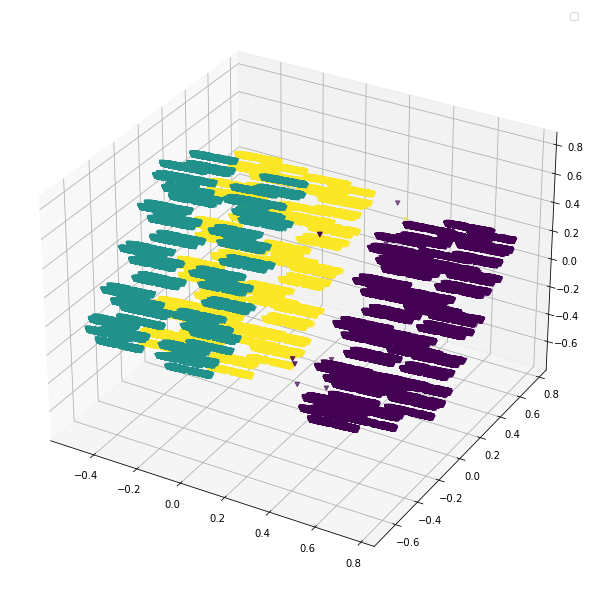

In [14]:
# Since silhouette score is more at value of cluster 3
labels , centers, kmeans_model = c.kmeans_clustering(3)


<div class="alert alert-block alert-warning">
    
The __observations__ in the cluster are:

1. We get aggregated view based on our analysis of consumer behavior patterns.

2. Based on this behavior one with the most number of points can be assigned as __Priority_1__ followed by 2 and 3.

3. The buying pattern plays an important role in doing demand capacity planning and we can plan out our __operational activities__ in this way following the priority.
    
</div>

In [15]:
## assign cluster to the dataframe
df['cluster'] = labels

In [16]:
##inverse transform
df['Category_Reporting'] = le.inverse_transform(df['Category_Reporting'])

In [19]:
## save it for prediction
df.to_csv('EMP_Cleaned_File.csv', index = False)

<div class="alert alert-block alert-success">
<b>Success:</b> We will now assign this cluster to our data and use this metric for prediction purpose.
</div>